In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
import seaborn as sns



In [73]:
data = pd.read_csv('data.csv')

data.head()
data['LogLH'] = np.log(data['LH'])



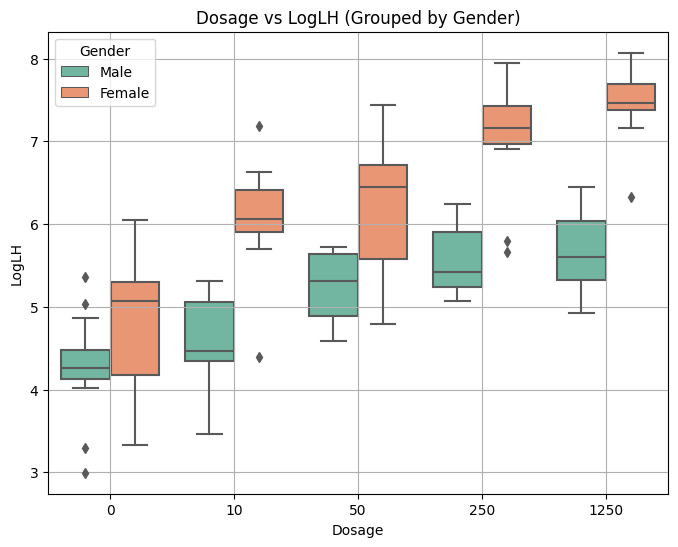

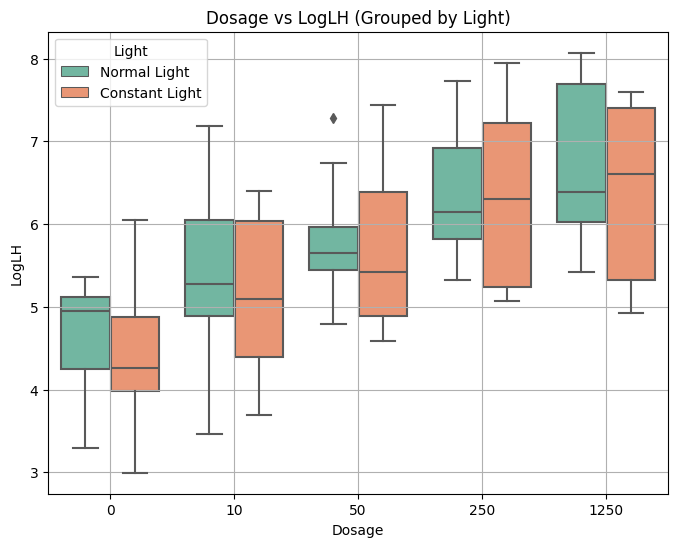

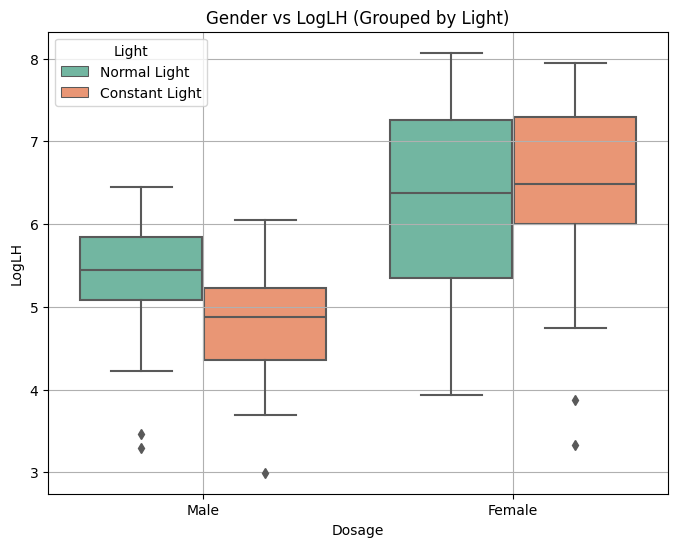

In [72]:


# Plot Dosage vs Y grouped by Gender using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Dosage', y='LogLH', hue='Gender', palette='Set2')
plt.title('Dosage vs LogLH (Grouped by Gender)')
plt.xlabel('Dosage')
plt.ylabel('LogLH')
plt.legend(title='Gender', loc='upper left')
plt.grid(True)
plt.show()

# Plot Dosage vs Y grouped by LightType using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Dosage', y='LogLH', hue='Light', palette='Set2')
plt.title('Dosage vs LogLH (Grouped by Light)')
plt.xlabel('Dosage')
plt.ylabel('LogLH')
plt.legend(title='Light', loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender', y='LogLH', hue='Light', palette='Set2')
plt.title('Gender vs LogLH (Grouped by Light)')
plt.xlabel('Dosage')
plt.ylabel('LogLH')
plt.legend(title='Light', loc='upper left')
plt.grid(True)
plt.show()


In [65]:
def fit_lm(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model

In [83]:

data['Female'] = (data['Gender'] == "Female").astype('int')
data["NormalLight"] = (data['Light'] == "Normal Light").astype('int')
data.head()

,Gender,Dosage,Light,LH,LogLH,Female,LightType,NormalLight
0,Male,0,Normal Light,212,5.356586,0,1,1
1,Male,0,Normal Light,27,3.295837,0,1,1
2,Male,0,Normal Light,68,4.219508,0,1,1
3,Male,0,Normal Light,72,4.276666,0,1,1
4,Male,0,Normal Light,130,4.867534,0,1,1


In [84]:
X = data[['Dosage', 'NormalLight', 'Female']]
y = data['LogLH']

model = fit_lm(X, y)



                            OLS Regression Results                            
Dep. Variable:                  LogLH   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     41.67
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.39e-18
Time:                        12:52:41   Log-Likelihood:                -143.41
No. Observations:                 120   AIC:                             294.8
Df Residuals:                     116   BIC:                             306.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.6108      0.137     33.559      

In [42]:
# VIF
vif = pd.DataFrame()
vif["Predictor"] = X.columns
vif["VIF"] = [1 / (1 - model.rsquared_adj)] * (len(X.columns))
vif = vif.round(2)
print(vif)

   Predictor   VIF
0     Dosage  2.03
1  LightType  2.03
2     Gender  2.03


In [85]:
#Interaction
X.head()
X['Female:NormalLight'] = X['Female'] * X['NormalLight']
X['Female:Dosage'] = X['Female'] * X['Dosage'] 
X['Dosage:NormalLight'] = X['Dosage'] * X['NormalLight']

model = fit_lm(X, y)
 
 
improved_model = fit_lm(X.drop(columns=['Dosage:NormalLight']), y)

                            OLS Regression Results                            
Dep. Variable:                  LogLH   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     24.18
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.96e-18
Time:                        12:53:00   Log-Likelihood:                -137.73
No. Observations:                 120   AIC:                             289.5
Df Residuals:                     113   BIC:                             309.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.5370      0

/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_31420/1177332300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Female:NormalLight'] = X['Female'] * X['NormalLight']
/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_31420/1177332300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Female:Dosage'] = X['Female'] * X['Dosage']
/var/folders/58/5ykpt7jd5j3glrpcfm9l37x40000gn/T/ipykernel_31420/1177332300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [ ]:
#HISTOGRAM PLOTS
plt.hist(data['LH'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('LH')
plt.ylabel('Frequency')
plt.title('Histogram of LH')

# Show the plot
plt.show()

plt.hist(data['LogLH'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('LogLH')
plt.ylabel('Frequency')
plt.title('Histogram of LogLH')

# Show the plot
plt.show()
